### S&P 500 Prediction by Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff

In [85]:
# Oldest date is 1928-01-06 (Volume records since 1951-Dec-24)
SP = pd.read_csv('data/S&P500.csv')
SP['Date']= pd.to_datetime(SP['Date'])
SP['Year'] = SP['Date'].dt.year
SP['Month'] = SP['Date'].dt.month
SP['Day'] = SP['Date'].dt.day

# Manually converting 2027 ~ 2072 to Year 1927 ~ 1972 and combine 'Date' again
SP['Year'] = np.where((SP['Year'] >= 2027), SP['Year'] - 100, SP.Year)
SP['Date_adj'] = pd.to_datetime(SP[['Year','Month','Day']])
SP = SP.drop(['Date','Year','Month','Day'], axis=1)
SP = SP.rename(columns = {'Open':'S&P_Open','Close*':'S&P_Close','Volume':'S&P_Volume','Date_adj':'Date'})
SP = SP.set_index('Date')
SP.replace(to_replace=',', value='', inplace=True, regex = True)
SP.replace(to_replace='-', value=np.nan, inplace=True)
SP.sort_index(ascending=True, inplace=True)

In [86]:
SP = SP.astype(float)

In [87]:
SP.head(5)

S&P_Open   High    Low  S&P_Close  Adj Close**  S&P_Volume
Date                                                                  
1927-12-30     17.66  17.66  17.66      17.66        17.66         NaN
1928-01-03     17.76  17.76  17.76      17.76        17.76         NaN
1928-01-04     17.72  17.72  17.72      17.72        17.72         NaN
1928-01-05     17.55  17.55  17.55      17.55        17.55         NaN
1928-01-06     17.66  17.66  17.66      17.66        17.66         NaN

In [88]:
print('Dataset Shape: ',  SP.shape)

Dataset Shape:  (23783, 6)


#### Visualizing the Time Series Data

<AxesSubplot:title={'center':'S&P 500 Closing Price'}, xlabel='Date'>

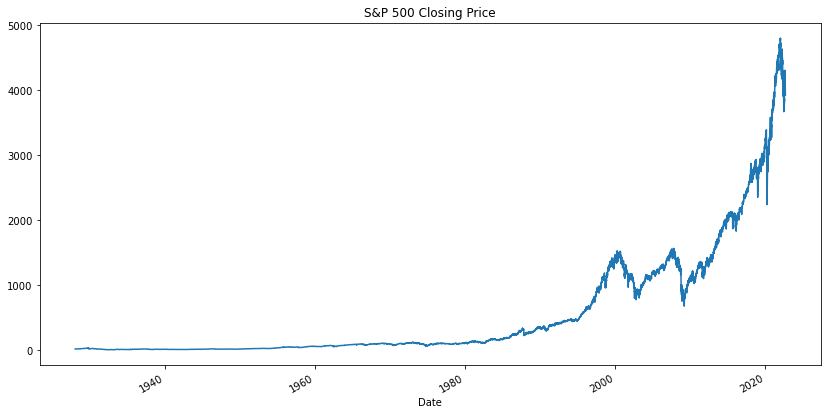

In [89]:
SP['S&P_Close'].plot(figsize=(14,7), title="S&P 500 Closing Price")

<AxesSubplot:title={'center':'S&P 500 Closing Price'}, xlabel='Date'>

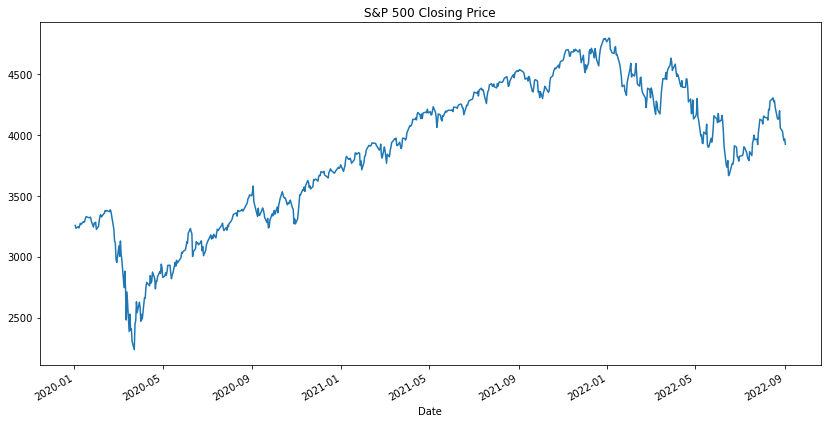

In [90]:
SP['S&P_Close']['2020-01-01':].plot(figsize=(14,7), title="S&P 500 Closing Price")

#### Handling Missing Values in Time Series Data

In [91]:
#calculating missing values in the dataset

missing_values = SP.isnull().sum()
missing_per = (missing_values/SP.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

Total Missing Values  Missing %
S&P_Open                        0   0.000000
High                            0   0.000000
Low                             0   0.000000
S&P_Close                       0   0.000000
Adj Close**                     0   0.000000
S&P_Volume                   5496  23.108943

In [92]:
SP.loc[:'1950-01-05', :]

S&P_Open   High    Low  S&P_Close  Adj Close**  S&P_Volume
Date                                                                  
1927-12-30     17.66  17.66  17.66      17.66        17.66         NaN
1928-01-03     17.76  17.76  17.76      17.76        17.76         NaN
1928-01-04     17.72  17.72  17.72      17.72        17.72         NaN
1928-01-05     17.55  17.55  17.55      17.55        17.55         NaN
1928-01-06     17.66  17.66  17.66      17.66        17.66         NaN
...              ...    ...    ...        ...          ...         ...
1949-12-29     16.68  16.68  16.68      16.68        16.68         NaN
1949-12-30     16.79  16.79  16.79      16.79        16.79         NaN
1950-01-03     16.66  16.66  16.66      16.66        16.66   1260000.0
1950-01-04     16.85  16.85  16.85      16.85        16.85   1890000.0
1950-01-05     16.93  16.93  16.93      16.93        16.93   2550000.0

[5499 rows x 6 columns]

In [93]:
SP['S&P_Volume'] = SP['S&P_Volume'].fillna(method='ffill')

In [94]:
SP.loc[:'1950-01-05', :]

S&P_Open   High    Low  S&P_Close  Adj Close**  S&P_Volume
Date                                                                  
1927-12-30     17.66  17.66  17.66      17.66        17.66         NaN
1928-01-03     17.76  17.76  17.76      17.76        17.76         NaN
1928-01-04     17.72  17.72  17.72      17.72        17.72         NaN
1928-01-05     17.55  17.55  17.55      17.55        17.55         NaN
1928-01-06     17.66  17.66  17.66      17.66        17.66         NaN
...              ...    ...    ...        ...          ...         ...
1949-12-29     16.68  16.68  16.68      16.68        16.68         NaN
1949-12-30     16.79  16.79  16.79      16.79        16.79         NaN
1950-01-03     16.66  16.66  16.66      16.66        16.66   1260000.0
1950-01-04     16.85  16.85  16.85      16.85        16.85   1890000.0
1950-01-05     16.93  16.93  16.93      16.93        16.93   2550000.0

[5499 rows x 6 columns]

### Exploratory Data Analysis

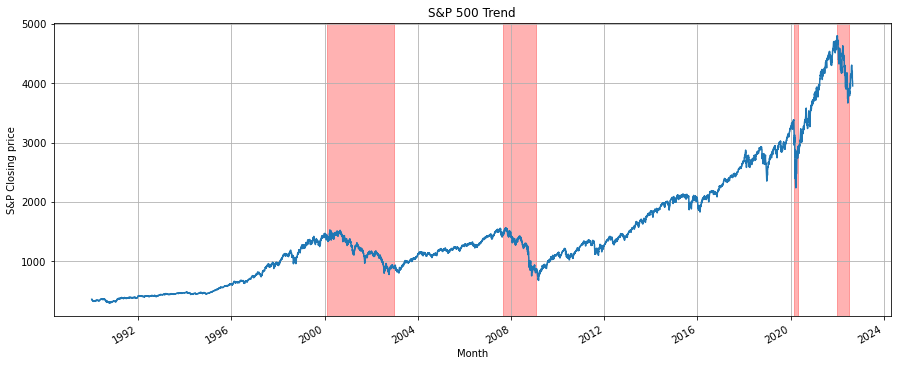

In [95]:
#Zooming in

ax = SP.loc['1990-01-03':'2022-08-31','S&P_Close'].plot(linestyle='-',figsize=(15,6), 
                                                        title="S&P 500 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('S&P Closing price')

ax.axvspan('2000-02-01','2002-12-31',color='red', alpha=0.3)
ax.axvspan('2007-09-01','2009-01-31',color='red', alpha=0.3)
ax.axvspan('2020-03-01','2020-04-30',color='red', alpha=0.3)
ax.axvspan('2022-01-02','2022-06-30',color='red', alpha=0.3)

# Visualizing using Lag Plots

Lag plot are used to observe the autocorrelation. These are crucial when we try to correct the trend and stationarity and we have to use smoothing functions. Lag plot helps us to understand the data better.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


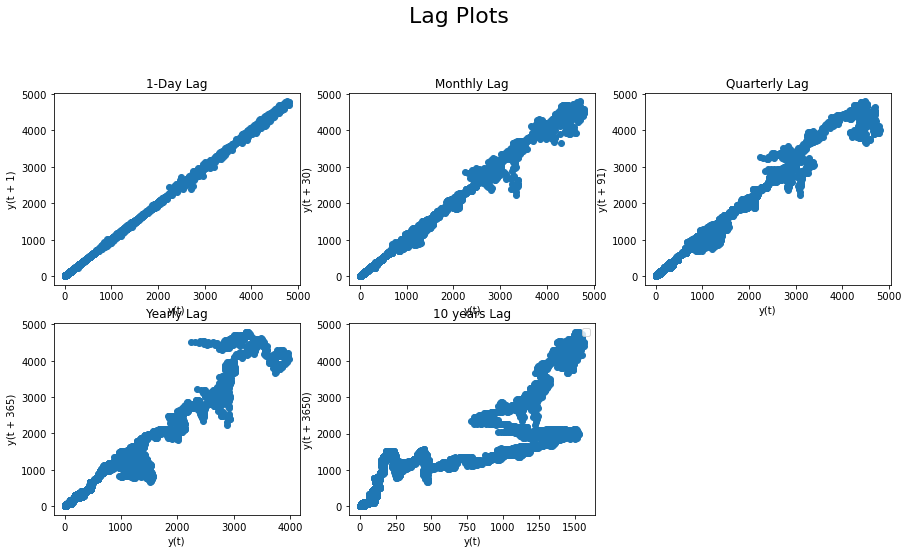

In [97]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(SP['S&P_Close'], lag=1) #day lag
plt.title('1-Day Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(SP['S&P_Close'], lag=30) #monthly lag
plt.title('Monthly Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(SP['S&P_Close'], lag=91) #quarterly lag
plt.title('Quarterly Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(SP['S&P_Close'], lag=365) #yearly lag
plt.title('Yearly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(SP['S&P_Close'], lag=3650) #10years lag
plt.title('10 years Lag')

plt.legend()
plt.show()

We can see that there is a positive correlation for daily, monthly and quarterly lag plots. We observe less correlation for 10 years lag plots.

It makes sense to re-sample our data atmost at the Monthly level, thereby preserving the autocorrelation as well. 

# Plotting using Plotly

Plotly allows us to make interactve charts which are pretty useful in financial analysis. 

* The **range-sliders** can be used to zoom-in and zoom-out.
* The **range-selectors** can be used to select the range.

In [98]:
import plotly.express as px

fig = px.line(SP, x=SP.index, y='S&P_Close', title='S&P_Close')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [99]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x= SP.index,
                    open=SP['S&P_Open'],
                    high=SP['High'],
                    low=SP['Low'],
                    close=SP['S&P_Close']))

fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

# Time Series Decomposition & Statistical Tests

We can decompose a time series into trend, seasonal amd remainder components, as mentioned in the earlier section. The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.
The seasonal_decompose in statsmodels is used to implements the decomposition.

We will then perform some statistical tests like [KPSS](http://en.wikipedia.org/wiki/KPSS_test) and [Augmented Dickey–Fuller](http://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) tests to check stationarity. 

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

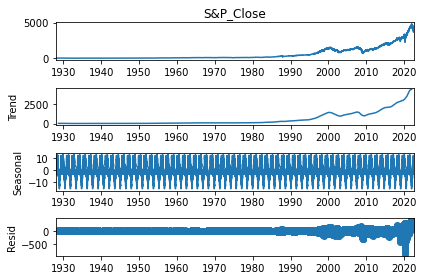

<Figure size 1080x864 with 0 Axes>

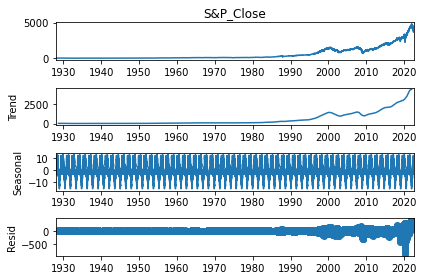

In [103]:
plt.figure(figsize=(15,12))
series = SP['S&P_Close']
result = seasonal_decompose(series, model='additive',period=365)
result.plot()

Post time series decomposition we don't observe any seasonality. Also, there is no constant mean, variance and covariance, hence the series is Non Stationary. We will perform statistical tests like KPSS and ADF to confirm our understanding.

But first, let's plot ACF and PACF graphs.

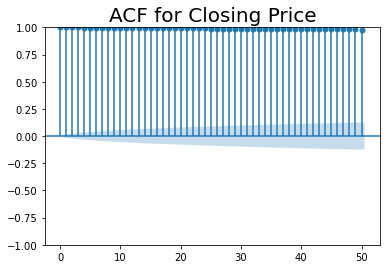

In [104]:
#ACF - Autocorrelation 
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Closing Price", size=20)
plt.show()

The above graph shows that effect barely detoriate over time, so past values affect the present ones. The more lags we include, the better our model will fit the dataset, now the risk is coefficients might predict the dataset too well, cause an overfitting.
In our model, we always try to include only those lags which have a direct effect on our present value. Hence, let's try PACF.

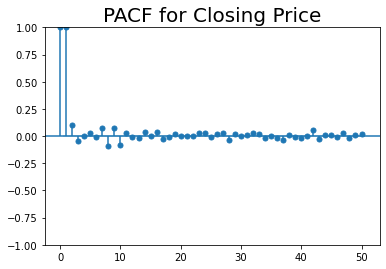

In [105]:
#PACF - Partial Auto Correlation
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Closing Price", size=20)
plt.show()

# ADF Test

The only difference here is the Null hypothesis which is just opposite of KPSS.

The null hypothesis of the test is the presence of **unit root**, that is, the series is **non-stationary**.

In [106]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    

    if p > 0.05: ('Series is not Stationary')
    else: ('Series is Stationary')

In [107]:
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                     3.567000
p-value                            1.000000
#Lags Used                        47.000000
Number of Observations Used    23735.000000
Critical Value (1%)               -3.430626
Critical Value (5%)               -2.861662
Critical Value (10%)              -2.566835
dtype: float64


# Conclusion


ADF says series is not stationary. We will use **differencing** to make series stationary.

# Feature Extraction

# Rolling windows

Time series data can be noisy due to high fluctuations in the market. As a result, it becomes difficult to gauge a trend or pattern in the data. 

As we’re looking at daily data, there’s quite a bit of noise present. It would be nice if we could average this out by a week, which is where a rolling mean comes in. 

A rolling mean, or moving average, is a transformation method which helps average out noise from data. It works by simply splitting and aggregating the data into windows according to function, such as mean(), median(), count(), etc. For this example, we’ll use a rolling mean for 3, 12 and 120 months.

In [111]:
df = SP

In [112]:
df.reset_index(drop=False, inplace=True)

lag_features = ["S&P_Open", "High", "Low", "S&P_Close","S&P_Volume"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

C:\Users\Irene\AppData\Local\Temp\ipykernel_25476\3619797079.py:29: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Date  S&P_Open   High    Low  S&P_Close  Adj Close**  \
Date                                                                    
1927-12-30 1927-12-30     17.66  17.66  17.66      17.66        17.66   
1928-01-03 1928-01-03     17.76  17.76  17.76      17.76        17.76   
1928-01-04 1928-01-04     17.72  17.72  17.72      17.72        17.72   
1928-01-05 1928-01-05     17.55  17.55  17.55      17.55        17.55   
1928-01-06 1928-01-06     17.66  17.66  17.66      17.66        17.66   

              S&P_Volume  S&P_Open_mean_lag3  S&P_Open_mean_lag7  \
Date                                                               
1927-12-30  1.079345e+09          538.120511          537.781183   
1928-01-03  1.079345e+09           17.660000           17.660000   
1928-01-04  1.079345e+09           17.710000           17.710000   
1928-01-05  1.079345e+09           17.713333           17.713333   
1928-01-06  1.079345e+09           17.676667           17.672500   

            S&P_Open_mean_lag30  ...  S&P_Close_mean_lag30  \
Date                             ...                         
1927-12-30           535.772740  ...            556.090873   
1928-01-03            17.660000  ...             17.660000   
1928-01-04            17.710000  ...             17.710000   
1928-01-05            17.713333  ...             17.713333   
1928-01-06            17.672500  ...             17.672500   

            S&P_Close_std_lag3  S&P_Close_std_lag7  S&P_Close_std_lag30  \
Date                                                                      
1927-12-30            3.806948            5.627503            10.938930   
1928-01-03            3.806948            5.627503            10.938930   
1928-01-04            0.070711            0.070711             0.070711   
1928-01-05            0.050332            0.050332             0.050332   
1928-01-06            0.111505            0.091424             0.091424   

            S&P_Volume_mean_lag3  S&P_Volume_mean_lag7  S&P_Volume_mean_lag30  \
Date                                                                            
1927-12-30          1.078971e+09          1.078611e+09           1.076509e+09   
1928-01-03          1.078971e+09          1.078611e+09           1.076509e+09   
1928-01-04          1.078971e+09          1.078611e+09           1.076509e+09   
1928-01-05          1.078971e+09          1.078611e+09           1.076509e+09   
1928-01-06          1.078971e+09          1.078611e+09           1.076509e+09   

            S&P_Volume_std_lag3  S&P_Volume_std_lag7  S&P_Volume_std_lag30  
Date                                                                        
1927-12-30         1.120245e+08         1.385413e+08          1.770071e+08  
1928-01-03         1.120245e+08         1.385413e+08          1.770071e+08  
1928-01-04         1.120245e+08         1.385413e+08          1.770071e+08  
1928-01-05         1.120245e+08         1.385413e+08          1.770071e+08  
1928-01-06         1.120245e+08         1.385413e+08          1.770071e+08  

[5 rows x 37 columns]

Benefits :

So, what are the key benefits of calculating a moving average or using this rolling mean method? Our data becomes a lot less noisy and more reflective of the trend than the data itself.

Let's extract time and date features from the Date column.

In [113]:
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.isocalendar().week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

Date  S&P_Open   High    Low  S&P_Close  Adj Close**  \
Date                                                                    
1927-12-30 1927-12-30     17.66  17.66  17.66      17.66        17.66   
1928-01-03 1928-01-03     17.76  17.76  17.76      17.76        17.76   
1928-01-04 1928-01-04     17.72  17.72  17.72      17.72        17.72   
1928-01-05 1928-01-05     17.55  17.55  17.55      17.55        17.55   
1928-01-06 1928-01-06     17.66  17.66  17.66      17.66        17.66   

              S&P_Volume  S&P_Open_mean_lag3  S&P_Open_mean_lag7  \
Date                                                               
1927-12-30  1.079345e+09          538.120511          537.781183   
1928-01-03  1.079345e+09           17.660000           17.660000   
1928-01-04  1.079345e+09           17.710000           17.710000   
1928-01-05  1.079345e+09           17.713333           17.713333   
1928-01-06  1.079345e+09           17.676667           17.672500   

            S&P_Open_mean_lag30  ...  S&P_Volume_mean_lag3  \
Date                             ...                         
1927-12-30           535.772740  ...          1.078971e+09   
1928-01-03            17.660000  ...          1.078971e+09   
1928-01-04            17.710000  ...          1.078971e+09   
1928-01-05            17.713333  ...          1.078971e+09   
1928-01-06            17.672500  ...          1.078971e+09   

            S&P_Volume_mean_lag7  S&P_Volume_mean_lag30  S&P_Volume_std_lag3  \
Date                                                                           
1927-12-30          1.078611e+09           1.076509e+09         1.120245e+08   
1928-01-03          1.078611e+09           1.076509e+09         1.120245e+08   
1928-01-04          1.078611e+09           1.076509e+09         1.120245e+08   
1928-01-05          1.078611e+09           1.076509e+09         1.120245e+08   
1928-01-06          1.078611e+09           1.076509e+09         1.120245e+08   

            S&P_Volume_std_lag7  S&P_Volume_std_lag30  month  week  day  \
Date                                                                      
1927-12-30         1.385413e+08          1.770071e+08     12    52   30   
1928-01-03         1.385413e+08          1.770071e+08      1     1    3   
1928-01-04         1.385413e+08          1.770071e+08      1     1    4   
1928-01-05         1.385413e+08          1.770071e+08      1     1    5   
1928-01-06         1.385413e+08          1.770071e+08      1     1    6   

            day_of_week  
Date                     
1927-12-30            4  
1928-01-03            1  
1928-01-04            2  
1928-01-05            3  
1928-01-06            4  

[5 rows x 41 columns]

# Model Building

# Important Note on Cross Validation

To measure the performance of our forecasting model, We typically want to split the time series into a training period and a validation period. This is called fixed partitioning. 

* If the time series has some seasonality, you generally want to ensure that each period contains a whole number of seasons. For example, one year, or two years, or three years, if the time series has a yearly seasonality. 
You generally don't want one year and a half, or else some months will be represented more than others. 
 
* We'll train our model on the training period, we'll evaluate it on the validation period. Here's where you can experiment to find the right architecture for training. And work on it and your hyper parameters, until you get the desired performance, measured using the validation set. Often, once you've done that, you can retrain using both the training and validation data.And then test on the test(or forecast) period to see if your model will perform just as well.
 
* And if it does, then you could take the unusual step of retraining again, using also the test data. But why would you do that? Well, it's because the test data is the closest data you have to the current point in time. And as such it's often the strongest signal in determining future values. If your model is not trained using that data, too, then it may not be optimal.

Here, we we will opt for a ***hold-out based validation***. 

Hold-out is used very frequently with time-series data. In this case, we will select all the data for 2020 as a hold-out and train our model on all the data from 1927 to 2008. 


In [114]:
df_train = df[df.index < "2008"]
df_valid = df[df.index >= "2008"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (20088, 41)
validation shape : (3695, 41)


# ARIMA Model

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

* **AR: Autoregression** A model that uses the dependent relationship between an observation and some number of lagged observations.
* **I: Integrated** The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* **MA: Moving Average** A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specic ARIMA model being used.

* **p**: The number of lag observations included in the model, also called the lag order.
* **d**: The number of times that the raw observations are differenced, also called the degree of dfferencing.
* **q**: The size of the moving average window, also called the order of moving average.

Happy further reading [here](http://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)

In [118]:
import pmdarima as pm

In [119]:
df.columns

Index(['Date', 'S&P_Open', 'High', 'Low', 'S&P_Close', 'Adj Close**',
       'S&P_Volume', 'S&P_Open_mean_lag3', 'S&P_Open_mean_lag7',
       'S&P_Open_mean_lag30', 'S&P_Open_std_lag3', 'S&P_Open_std_lag7',
       'S&P_Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7',
       'High_mean_lag30', 'High_std_lag3', 'High_std_lag7', 'High_std_lag30',
       'Low_mean_lag3', 'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3',
       'Low_std_lag7', 'Low_std_lag30', 'S&P_Close_mean_lag3',
       'S&P_Close_mean_lag7', 'S&P_Close_mean_lag30', 'S&P_Close_std_lag3',
       'S&P_Close_std_lag7', 'S&P_Close_std_lag30', 'S&P_Volume_mean_lag3',
       'S&P_Volume_mean_lag7', 'S&P_Volume_mean_lag30', 'S&P_Volume_std_lag3',
       'S&P_Volume_std_lag7', 'S&P_Volume_std_lag30', 'month', 'week', 'day',
       'day_of_week'],
      dtype='object')

In [120]:
exogenous_features = ['S&P_Open_mean_lag3', 'S&P_Open_mean_lag7',
       'S&P_Open_mean_lag30', 'S&P_Open_std_lag3', 'S&P_Open_std_lag7',
       'S&P_Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7',
       'High_mean_lag30', 'High_std_lag3', 'High_std_lag7', 'High_std_lag30',
       'Low_mean_lag3', 'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3',
       'Low_std_lag7', 'Low_std_lag30', 'S&P_Close_mean_lag3',
       'S&P_Close_mean_lag7', 'S&P_Close_mean_lag30', 'S&P_Close_std_lag3',
       'S&P_Close_std_lag7', 'S&P_Close_std_lag30', 'S&P_Volume_mean_lag3',
       'S&P_Volume_mean_lag7', 'S&P_Volume_mean_lag30', 'S&P_Volume_std_lag3',
       'S&P_Volume_std_lag7', 'S&P_Volume_std_lag30', 'month', 'week', 'day',
       'day_of_week']

In [121]:
model = pm.auto_arima(df_train['S&P_Close'], exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train['S&P_Close'], exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=4.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=136459.427, Time=0.21 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=130774.808, Time=0.32 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.67 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=128349.103, Time=0.42 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=126818.875, Time=0.53 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=126105.933, Time=0.62 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=125533.601, Time=0.74 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=8.45 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=5.69 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=125535.600, Time=1.70 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 24.438 seconds


C:\Users\Irene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [127]:
forecast

20088     1469.650300
20089     1466.742410
20090     1462.095737
20091     1455.901897
20092     1452.748004
             ...     
23778   -13493.384065
23779   -13497.438939
23780   -13501.493813
23781   -13505.548687
23782   -13509.603561
Length: 3695, dtype: float64

<AxesSubplot:xlabel='Date'>

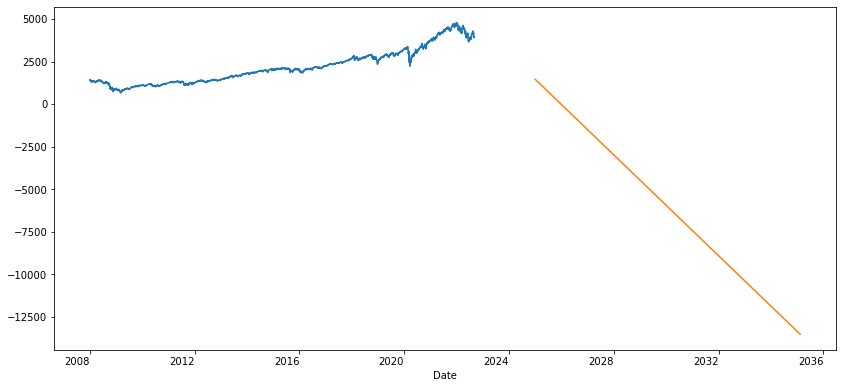

In [128]:
df_valid["S&P_Close"].plot(figsize=(14, 7))
forecast.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX)))

print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))